# Import 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the Data

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis
### Missing Data

<AxesSubplot:>

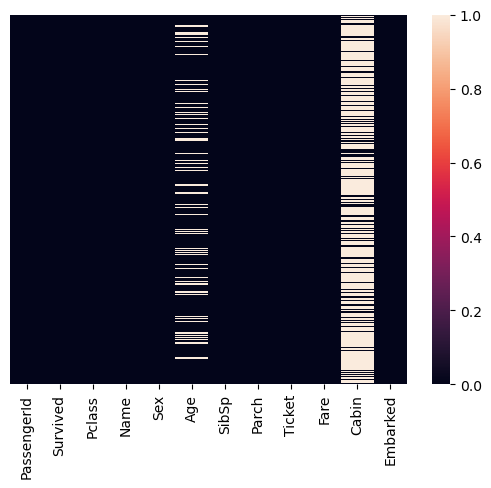

In [7]:
sns.heatmap(titanic.isnull(),yticklabels=False)

##### Roughly 20% of data is Missing

<AxesSubplot:xlabel='Survived', ylabel='count'>

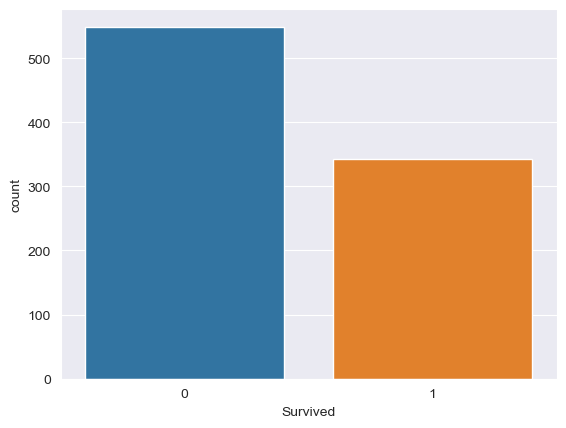

In [8]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data=titanic)

Here we observe that count of not survived passenger is more than survived one.

<AxesSubplot:xlabel='Survived', ylabel='count'>

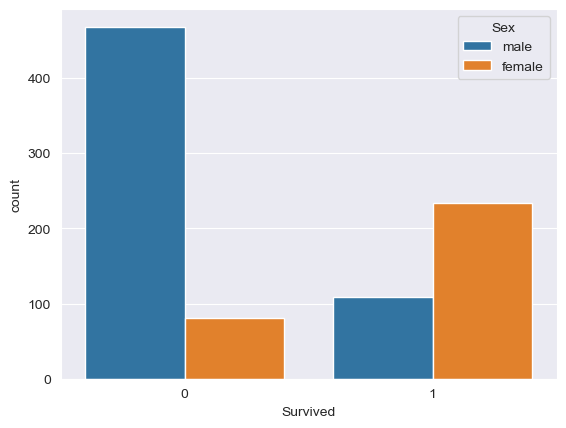

In [9]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = titanic, hue = 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

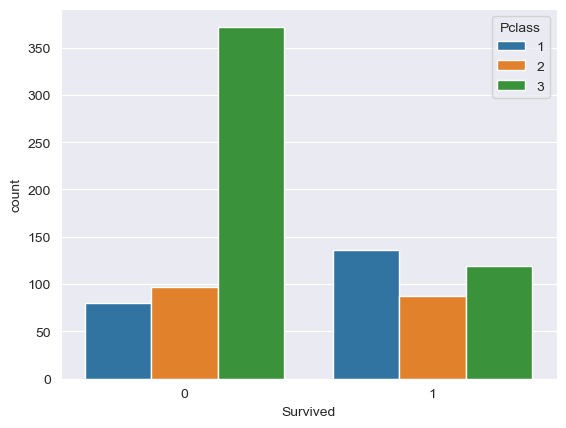

In [11]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = titanic,hue = 'Pclass')

survived rate according to passenger class 

<AxesSubplot:xlabel='AGE'>

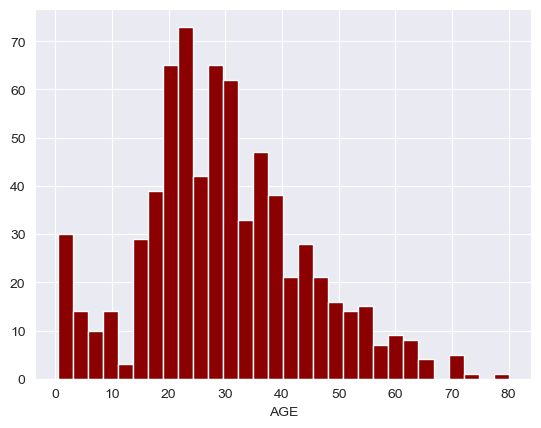

In [13]:
plt.xlabel('AGE')
titanic['Age'].hist(bins = 30,color = 'darkred')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

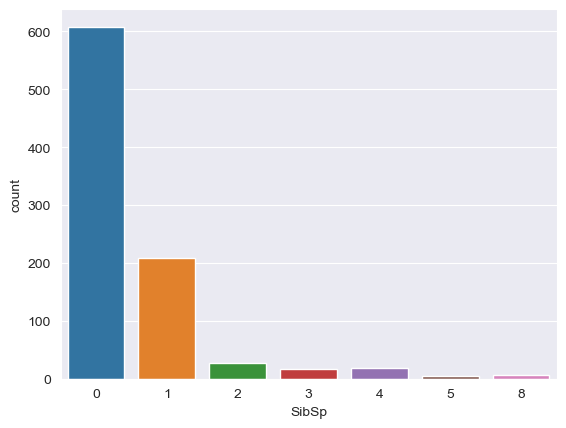

In [14]:
sns.countplot(x = 'SibSp',data = titanic)

<AxesSubplot:xlabel='FARE'>

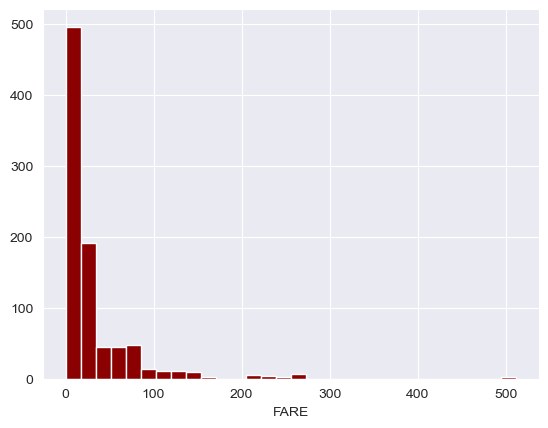

In [15]:
plt.xlabel('FARE')
titanic['Fare'].hist(bins = 30,color = 'darkred')

## Data Cleaning

##### We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

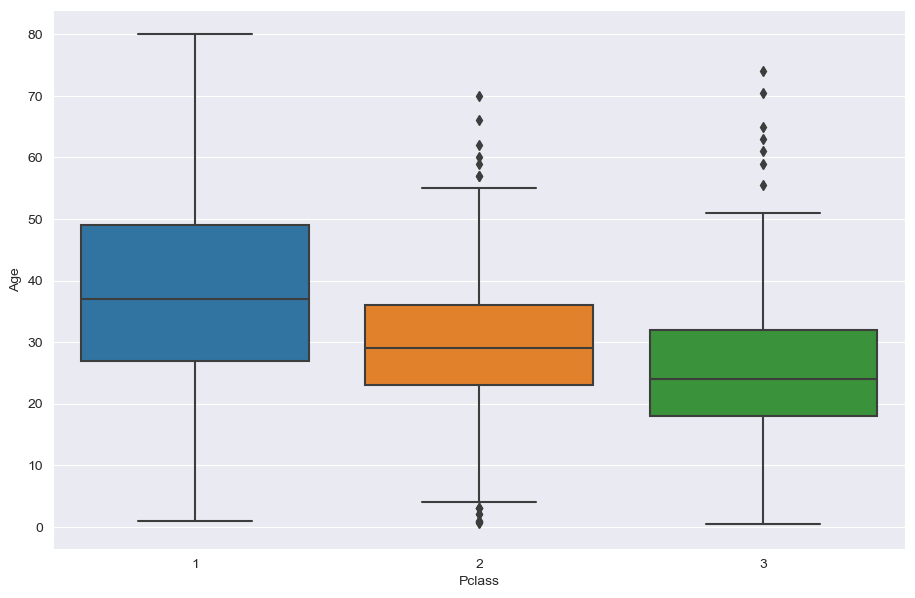

In [16]:
plt.figure(figsize=(11,7))
sns.boxplot(x = 'Pclass',y = 'Age',data = titanic)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [17]:
def func(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [18]:
titanic['Age'] = titanic[['Age','Pclass']].apply(func,axis=1)

##### Now check the heatmap again

<AxesSubplot:>

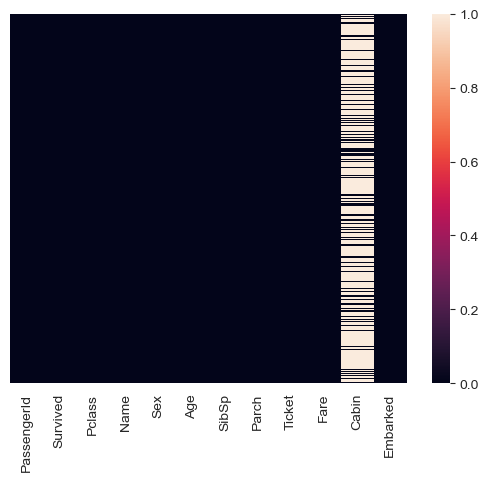

In [20]:
sns.heatmap(titanic.isnull(),yticklabels=False)

Drop the Cabin column and the row in Embarked that is NaN.

In [21]:
titanic.drop('Cabin',axis=1,inplace = True)

In [22]:
titanic.dropna(inplace=True)

##### Converting Categorical Features

In [23]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [24]:
titanic.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [25]:
titanic = pd.concat([titanic,sex,embark],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Build a Logistic Model

##### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X = titanic[['PassengerId','Pclass','Age','SibSp','Parch','Fare','male','Q','S']]
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)

In [28]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [29]:
predictions = logmodel.predict(X_test)

### Classification

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [32]:
print(confusion_matrix(y_test,predictions))

[[156  28]
 [ 26  84]]


#### Great